In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sales=pd.read_csv('/content/superstore_sales.csv')

In [ ]:
sales.shape

(9800, 18)

In [ ]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9800 non-null   object 
 1   Order Date    9800 non-null   object 
 2   Ship Date     9800 non-null   object 
 3   Ship Mode     9800 non-null   object 
 4   Customer ID   9800 non-null   object 
 5   Segment       9800 non-null   object 
 6   Country       9800 non-null   object 
 7   City          9800 non-null   object 
 8   State         9800 non-null   object 
 9   Postal Code   9789 non-null   float64
 10  Region        9800 non-null   int64  
 11  Product ID    9800 non-null   object 
 12  Category      9800 non-null   object 
 13  Sub-Category  9800 non-null   object 
 14  Product Name  9800 non-null   object 
 15  Sales         9800 non-null   float64
dtypes: float64(2), int64(1), object(13)
memory usage: 1.2+ MB


In [ ]:
sales.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
sales.dropna(axis=0,inplace=True)

In [ ]:
#Drop Row ID and Customer Name (Customer ID is available)
sales.drop(columns=['Row ID','Customer Name'],axis=1,inplace=True)


In [ ]:
sales.Country.value_counts()

United States    9800
Name: Country, dtype: int64

In [ ]:
#using encoder or use.map() to represent data in numerical format since Ship mode, Region, category have nominal data.
sales['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

In [ ]:
sales.Segment.value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [ ]:
sales.Region.value_counts()


West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

In [ ]:
sales['Region'] = sales['Region'].map({'Central': 0,'South':1,'East':2,'West':3})

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
sales.Category = label_encoder.fit_transform(sales['Category'])
sales['Ship Mode'] = label_encoder.fit_transform(sales['Ship Mode'])

In [ ]:
sales['Segment'] = label_encoder.fit_transform(sales['Segment'])
label_encoder.classes_

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
sales['Customer ID'].nunique()

793

In [ ]:
sales['Order ID'].nunique()

4916

In [ ]:
sales['Product ID'].nunique()

1860

In [ ]:
sales['order_date'] = sales['Order Date'].str.split('/').str[0]
sales['order_month'] = sales['Order Date'].str.split('/').str[1]
sales['order_year'] = sales['Order Date'].str.split('/').str[2]

In [ ]:
sales['ship_date'] = sales['Ship Date'].str.split('/').str[0]
sales['ship_month'] = sales['Ship Date'].str.split('/').str[1]
sales['ship_year'] = sales['Ship Date'].str.split('/').str[2]

In [ ]:

sales['order_date'] = sales['order_date'].astype(int)
sales['order_month'] = sales['order_month'].astype(int)
sales['order_year'] = sales['order_year'].astype(int)

In [ ]:
sales['ship_date']= sales['ship_date'].astype(int)
sales['ship_month'] = sales['ship_month'].astype(int)
sales['ship_year'] = sales['ship_year'].astype(int)

In [ ]:
sales.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,order_date,order_month,order_year,ship_date,ship_month,ship_year
0,CA-2017-152156,08/11/2017,11/11/2017,2,CG-12520,0,United States,Henderson,Kentucky,42420.0,...,0,Bookcases,Bush Somerset Collection Bookcase,261.9600,8,11,2017,11,11,2017
1,CA-2017-152156,08/11/2017,11/11/2017,2,CG-12520,0,United States,Henderson,Kentucky,42420.0,...,0,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,11,2017,11,11,2017
2,CA-2017-138688,12/06/2017,16/06/2017,2,DV-13045,1,United States,Los Angeles,California,90036.0,...,1,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,6,2017,16,6,2017
3,US-2016-108966,11/10/2016,18/10/2016,3,SO-20335,0,United States,Fort Lauderdale,Florida,33311.0,...,0,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,10,2016,18,10,2016
4,US-2016-108966,11/10/2016,18/10/2016,3,SO-20335,0,United States,Fort Lauderdale,Florida,33311.0,...,1,Storage,Eldon Fold 'N Roll Cart System,22.3680,11,10,2016,18,10,2016


In [ ]:
sales.drop(columns=['Order Date','Ship Date'], axis=1, inplace=True)

In [ ]:
sales.describe()

,Ship Mode,Segment,Postal Code,Region,Category,Sales,order_date,order_month,order_year,ship_date,ship_month,ship_year
count,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000
mean,2.235877,0.657677,55273.322403,1.692308,0.972827,230.116193,15.486771,7.822658,2016.723567,15.891817,7.756359,2016.738788
std,1.100134,0.762706,32041.223413,1.148871,0.629506,625.302079,8.755461,3.277864,1.124184,8.805848,3.334105,1.127048
min,0.000000,0.000000,1040.000000,0.000000,0.000000,0.444000,1.000000,1.000000,2015.000000,1.000000,1.000000,2015.000000
25%,2.000000,0.000000,23223.000000,1.000000,1.000000,17.248000,8.000000,5.000000,2016.000000,8.000000,5.000000,2016.000000
50%,3.000000,0.000000,58103.000000,2.000000,1.000000,54.384000,16.000000,9.000000,2017.000000,16.000000,9.000000,2017.000000
75%,3.000000,1.000000,90008.000000,3.000000,1.000000,210.392000,23.000000,11.000000,2018.000000,24.000000,11.000000,2018.000000
max,3.000000,2.000000,99301.000000,3.000000,2.000000,22638.480000,31.000000,12.000000,2018.000000,31.000000,12.000000,2019.000000


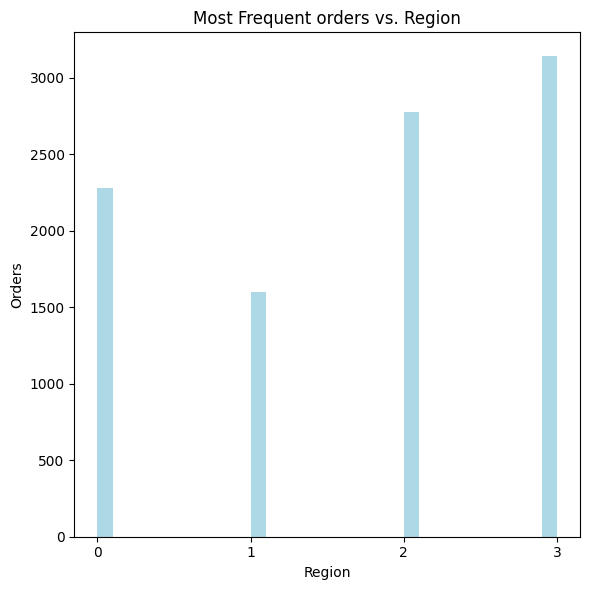

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(sales['Region'], bins=30, color='lightblue')
plt.title('Most Frequent orders vs. Region')
plt.xticks([0,1,2,3])
plt.xlabel('Region')
plt.ylabel('Orders')
plt.tight_layout()


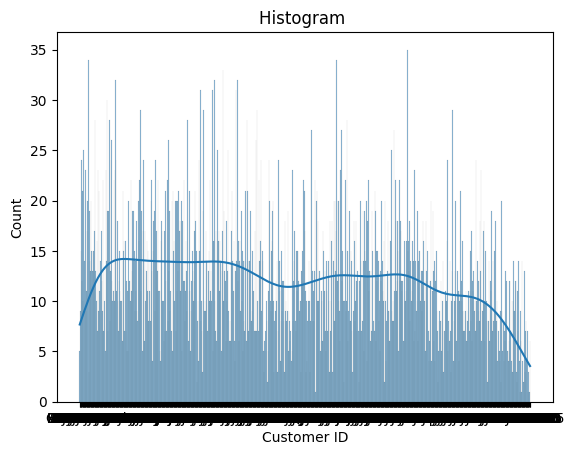

In [ ]:
plt.ticklabel_format(style='plain')
sns.histplot(sales['Customer ID'], kde=True)
plt.xlabel('Customer ID')
plt.title('Histogram ')
plt.show()


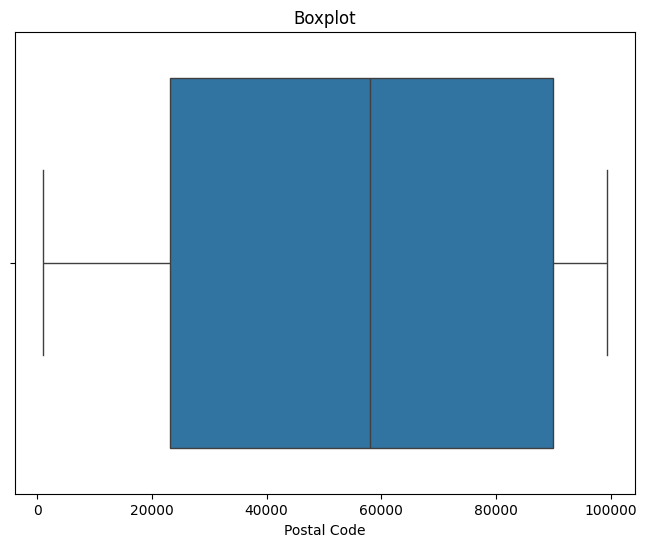

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=sales['Postal Code'])
plt.title('Boxplot')
plt.xlabel('Postal Code')
plt.show()

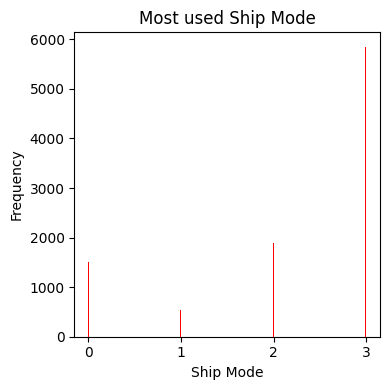

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(sales['Ship Mode'],bins=350, color='red')
plt.title('Most used Ship Mode')
plt.xticks([0,1,2,3])
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.tight_layout()

<ipython-input-36-f2fd00a587ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales,x='Segment', palette = 'dark')


<Axes: xlabel='Segment', ylabel='count'>

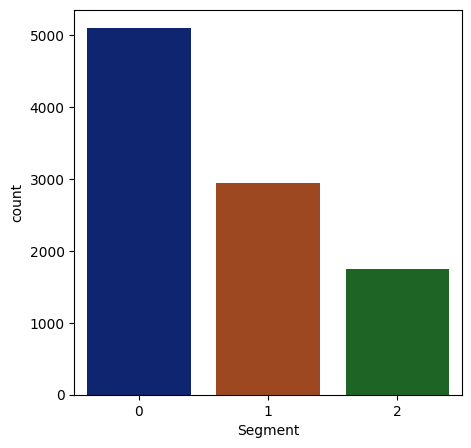

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=sales,x='Segment', palette = 'dark')

<ipython-input-41-5d83571302e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sub-Category',data=sales, palette='Set1')


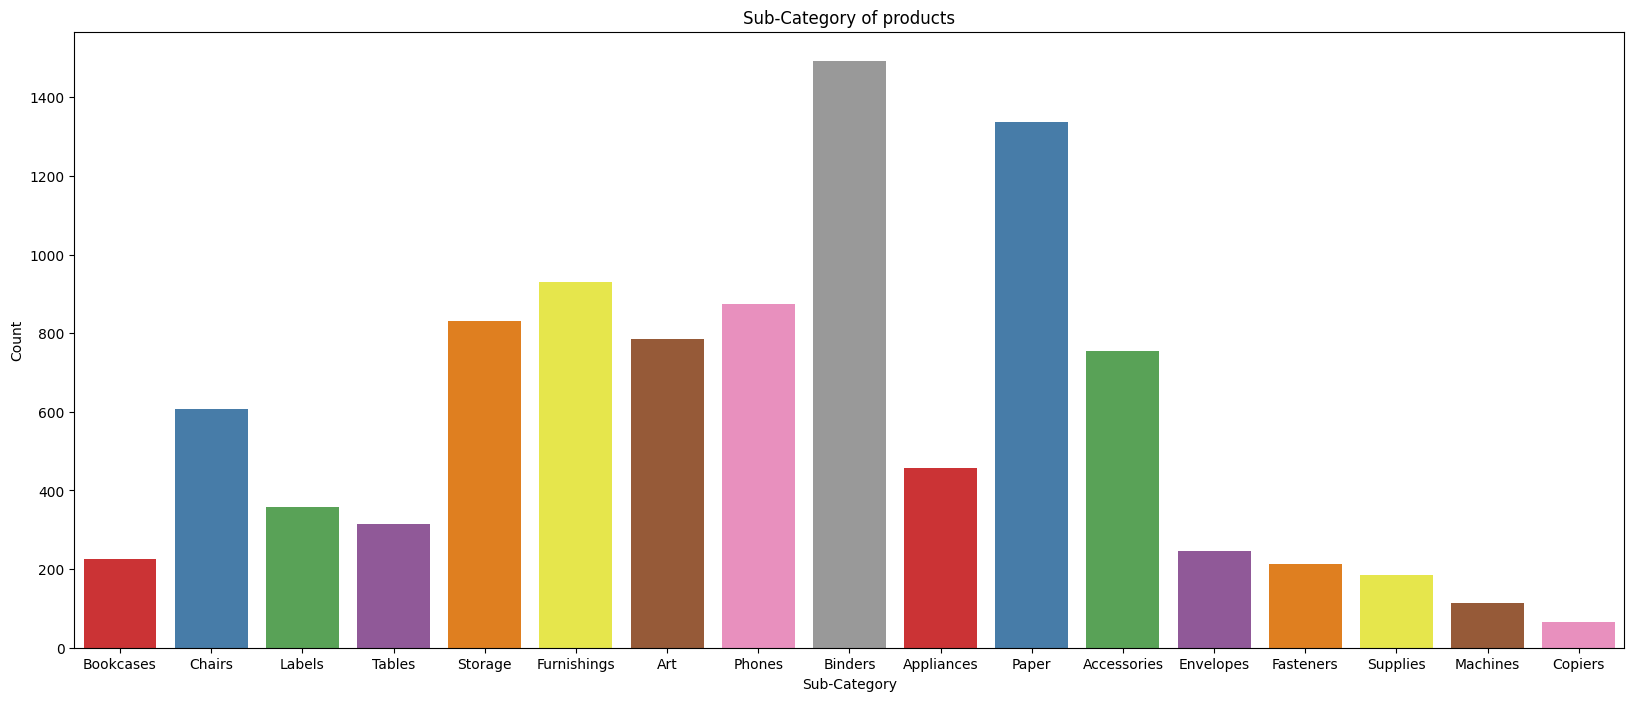

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='Sub-Category',data=sales, palette='Set1')
plt.title('Sub-Category of products')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.show()

In [ ]:
corr = sales.corr()

<ipython-input-42-e73a5f1cc519>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


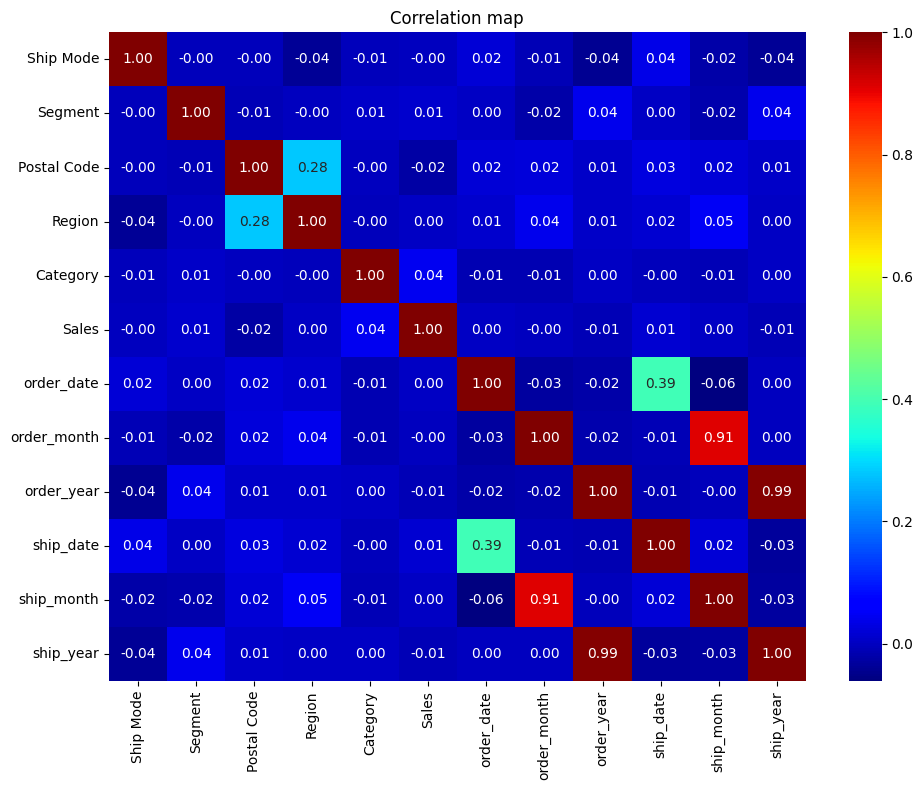

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='jet')
plt.title('Correlation map')
plt.tight_layout()

In [ ]:
monthly_sales = sales.groupby('order_month')['Sales'].sum()
yearly_sales = sales.groupby('order_year')['Sales'].sum()

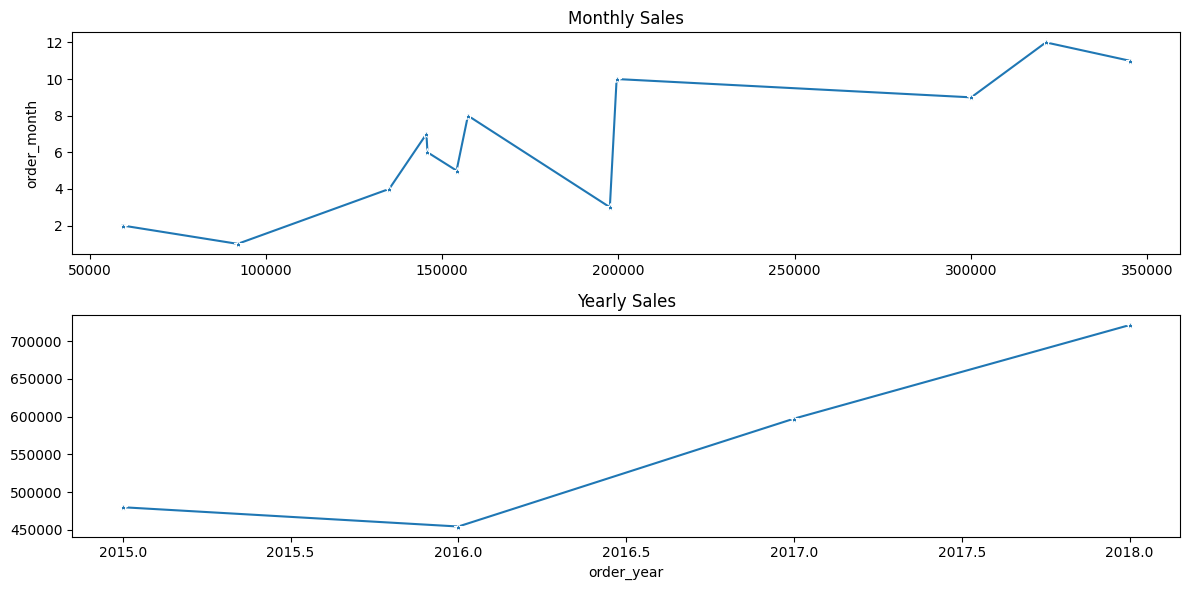

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.lineplot(x=monthly_sales.values, y=monthly_sales.index, marker='*')
plt.title('Monthly Sales')

plt.subplot(2,1,2)
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='*')
plt.title('Yearly Sales')

plt.tight_layout()

Text(0.5, 1.0, 'sales and order date vs Region')

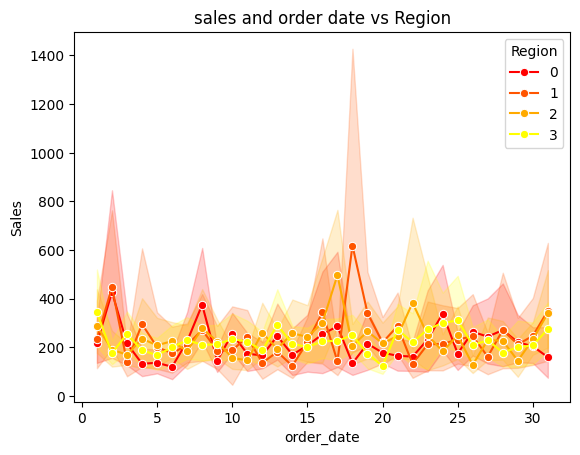

In [ ]:
sns.lineplot(x=sales['order_date'],y=sales['Sales'],hue=sales['Region'], marker='o', palette='autumn')
plt.title('sales and order date vs Region')

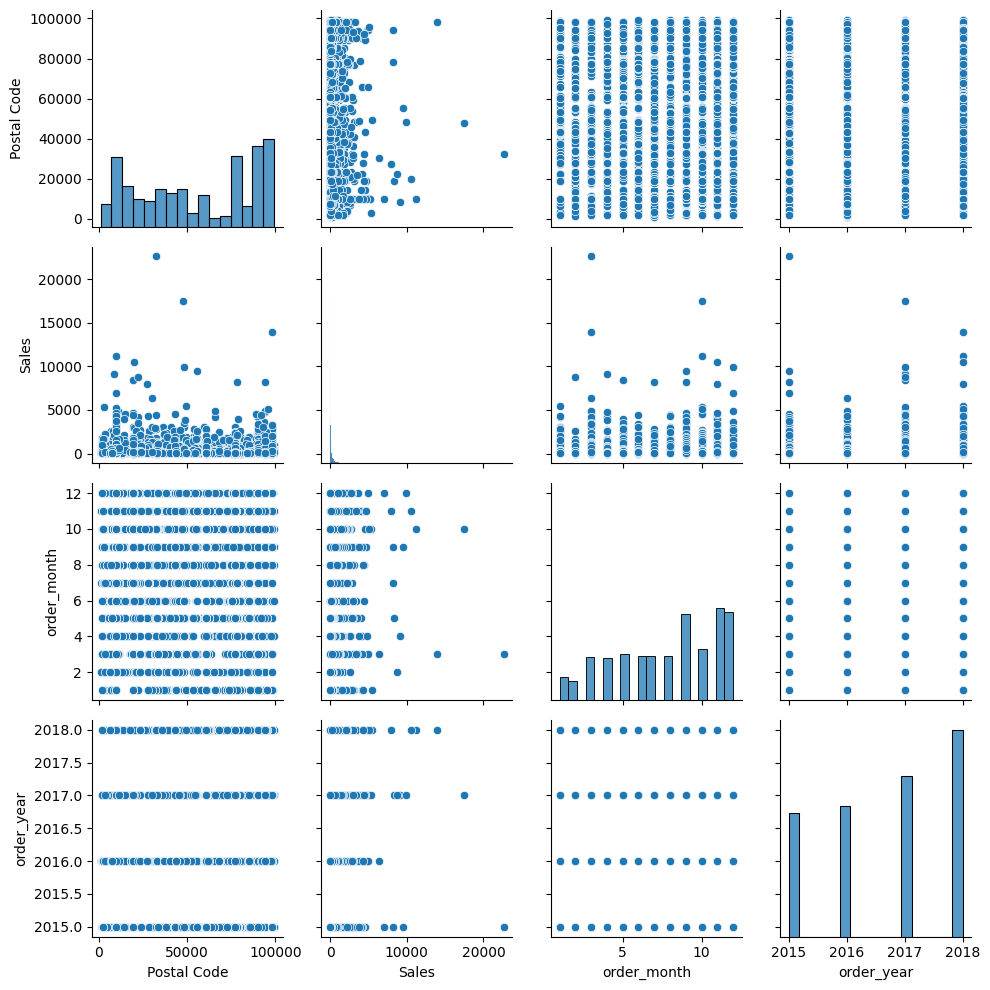

In [ ]:
data = sales[['Postal Code','Sales','order_month','order_year']]
sns.pairplot(data=data)
plt.tight_layout()